TEK DEĞİŞKENLİ AYKIRI GÖZLEM ANALİZİ

In [2]:
# "diamond" verisetini yüklüyoruz.
# Eksik değerlere sahip satırları siliyoruz.
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Veriseti içinden "table" değişkenini seçiyoruz.
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

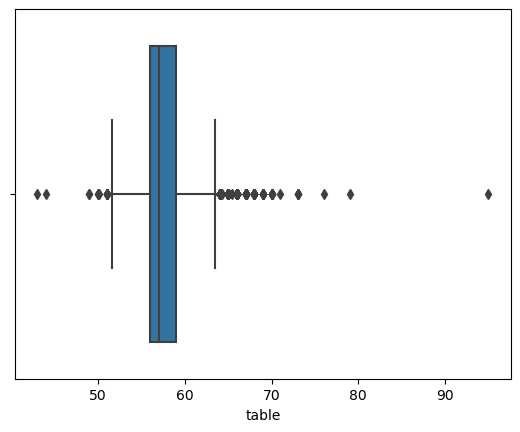

In [4]:
# Alt ve Üst sınırı belirlemek için boxplot yöntemini kullanıyoruz.
sns.boxplot(x = df_table);

In [5]:
# Q1 verisetinin 1/4'üncü değerini temsil eder.
# Q3 verisetinin 3/4'üncü değerini temsil eder.
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [6]:
# Alt ve üst sınırı belirliyoruz.
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [7]:
# Alt sınırdan düşük olan aykırı değerler. 
a_tf = (df_table < alt_sinir)
df_table[a_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [8]:
# Üst sınırdan yüksek olan aykırı değerler. 
u_tf = (ust_sinir < df_table)
df_table[u_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

Tek Değişkenli Aykırı Değer Problemi Çözüm Yöntemleri

1- Aykırı Değerleri Silmek

In [9]:
import pandas as pd
df_table = pd.DataFrame(df_table)

In [10]:
# Aykırı değerleri silme işleminden önce gözlem sayısını inceliyoruz.
df_table.shape

(53940, 1)

In [11]:
# Aykırı değerleri silme işlemini gerçekleştiriyoruz.
new_df_table = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [12]:
# Aykırı değerleri silme işleminden sonra gözlem sayısını inceliyoruz.
new_df_table.shape

(53335, 1)

2- Aykırı Değerler Yerine Ortalama Değerleri Yazdırmak

In [13]:
# "table" değişkeninin ortalamasını hesaplıyoruz.
df_table.mean()

table    57.457184
dtype: float64

In [16]:
# Alt sınırdan düşük olan aykırı değerler yerine ortalama değeri yazdırıyoruz.
df_table[a_tf] = df_table.mean()
df_table[a_tf]

,table
1515,57.374369
3238,57.374369
3979,57.374369
4150,57.374369
5979,57.374369
7418,57.374369
8853,57.374369
11368,57.374369
22701,57.374369
25179,57.374369


In [17]:
# Üst sınırdan yüksek olan aykırı değerler yerine ortalama değeri yazdırıyoruz.
df_table[u_tf] = df_table.mean()
df_table[u_tf]

,table
2,57.374344
91,57.374344
145,57.374344
219,57.374344
227,57.374344
...,...
53695,57.374344
53697,57.374344
53756,57.374344
53757,57.374344


3- Aykırı Değerler Yerine Alt ve Üst Sınır Değerlerini Yazdırmak (Baskılama)

In [18]:
# Alt sınırdan düşük olan aykırı değerler yerine alt sınır değerlini yazdırıyoruz.
df_table[a_tf] = alt_sinir
df_table[a_tf]

,table
1515,51.5
3238,51.5
3979,51.5
4150,51.5
5979,51.5
7418,51.5
8853,51.5
11368,51.5
22701,51.5
25179,51.5


In [19]:
# Üst sınırdan yüksek olan aykırı değerler yerine üst sınır değerlini yazdırıyoruz.
df_table[u_tf] = ust_sinir
df_table[u_tf]

,table
2,63.5
91,63.5
145,63.5
219,63.5
227,63.5
...,...
53695,63.5
53697,63.5
53756,63.5
53757,63.5


ÇOK DEĞİŞKENLİ AYKIRI GÖZLEM ANALİZİ

Local Outlier Factor (LOF):
Gözlem birimlerini bulunduğu konumdaki yoğunluğa göre değerlendirip aykırı gözlem olup olmadığını karar verir.

In [20]:
# LOF'u import ediyoruz.
from sklearn.neighbors import LocalOutlierFactor

In [21]:
# Kaç adet komşuluk ile kıyaslanacağını belirliyoruz.
lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [22]:
#Modeli veri kümesi üzerine uyguluyoruz.
lof.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [23]:
# Aykırılık derecesini belirlemek için yoğunluk skorunu belirliyoruz.
df_scores = lof.negative_outlier_factor_

In [24]:
# Yoğunluk skorlarını sıralıyoruz.
import numpy as np
np.sort(df_scores)

array([-8.60430658, -8.20889984, -5.86084355, ..., -0.9162733 ,
       -0.91366494, -0.91247688])

In [25]:
# Eşik değerini belirlemek için yoğunluk skorunun ortalamasını alıyoruz.
df_scores.mean()

-1.0717654981956308

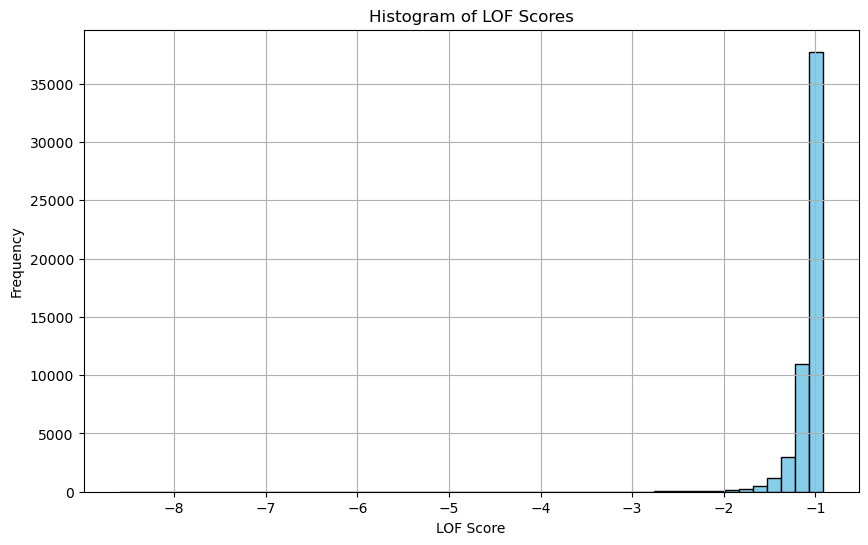

In [26]:
# Eşik değerini belirlemek ve yorumlamak için grafik oluşturuyoruz.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_scores, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.title('Histogram of LOF Scores')
plt.grid(True)
plt.show()

In [27]:
# Yoğunluk skorunun ortalamasına en yakın değer olan indexi eşik değer olarak belirliyoruz.
esik_deger = np.sort(df_scores)[15429]
esik_deger

-1.0717536937730694

In [28]:
# Aykırı değerleri belirliyoruz.
up_bound_value = df[df_scores < esik_deger]
up_bound_value

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53897,1.02,64.3,63.0,2751,6.28,6.23,4.02
53902,0.77,59.9,61.0,2753,5.98,6.01,3.59
53918,0.76,59.3,62.0,2753,5.93,5.85,3.49
53927,0.79,58.1,59.0,2756,6.06,6.13,3.54


Çok Değişkenli Aykırı Değer Problemi Çözüm Yöntemleri

1- Aykırı Değerleri Silmek

In [29]:
# Aykırı olmayan değerli belirliyoruz.
new_df  = df[df_scores > esik_deger]
new_df

,carat,depth,table,price,x,y,z
22,0.23,61.0,57.0,353,3.94,3.96,2.41
26,0.24,62.5,57.0,355,3.97,3.94,2.47
27,0.30,62.2,57.0,357,4.28,4.30,2.67
29,0.23,60.9,57.0,357,3.96,3.99,2.42
30,0.23,60.0,57.0,402,4.00,4.03,2.41
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


2- Aykırı Değerler Yerine Alt ve Üst Sınır Değerlerini Yazdırmak (Baskılama)

In [30]:
# Eşik değer ile yoğunluk skorunun eşit olduğu değeri belirliyoruz.
bound_value = df[df_scores == esik_deger]

In [31]:
# Yoğunluk değerleri eşik değerinden büyük olanları belirliyoruz.
up_value_tf = df_scores > esik_deger
up_value = df[~up_value_tf]

In [32]:
# Aykırı değerleri biz dizi olarak alıyoruz.
# Değişkeni baskılanan değerler ile dolduruyoruz.
res = up_value.to_records(index = False)
res[:] = bound_value.to_records(index = False)
res

rec.array([(0.9, 61.5, 61., 3507, 6.1, 6.06, 3.74),
           (0.9, 61.5, 61., 3507, 6.1, 6.06, 3.74),
           (0.9, 61.5, 61., 3507, 6.1, 6.06, 3.74), ...,
           (0.9, 61.5, 61., 3507, 6.1, 6.06, 3.74),
           (0.9, 61.5, 61., 3507, 6.1, 6.06, 3.74),
           (0.9, 61.5, 61., 3507, 6.1, 6.06, 3.74)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [33]:
# Aykırı değerlerin bulunduğu satırları, baskı değerleriyle değiştiriyoruz.
df[~up_value_tf] = pd.DataFrame(res, index = df[~up_value_tf].index)
df[~up_value_tf]

,carat,depth,table,price,x,y,z
0,0.9,61.5,61.0,3507,6.1,6.06,3.74
1,0.9,61.5,61.0,3507,6.1,6.06,3.74
2,0.9,61.5,61.0,3507,6.1,6.06,3.74
3,0.9,61.5,61.0,3507,6.1,6.06,3.74
4,0.9,61.5,61.0,3507,6.1,6.06,3.74
...,...,...,...,...,...,...,...
53897,0.9,61.5,61.0,3507,6.1,6.06,3.74
53902,0.9,61.5,61.0,3507,6.1,6.06,3.74
53918,0.9,61.5,61.0,3507,6.1,6.06,3.74
53927,0.9,61.5,61.0,3507,6.1,6.06,3.74


EKSİK VERİ ANALİZİ

Eksik Değerlerin Saptanması

In [34]:
# Planets verisetini import ediyoruz.
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [35]:
# Değişkenlerdeki tam değer sayısını gözlemliyoruz.
df.notnull().sum()

method            1035
number            1035
orbital_period     992
mass               513
distance           808
year              1035
dtype: int64

In [36]:
# Değişkenlerdeki eksik değer sayısı gözlemliyoruz.
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [37]:
# Veri setindeki toplam eksik değer sayısını gözlemliyoruz.
df.isnull().sum().sum()

792

In [38]:
# Verisetinde en az bir eksik değere sahip gözlemleri inceliyoruz.
df[df.isnull().any(axis=1)]

,method,number,orbital_period,mass,distance,year
7,Radial Velocity,1,798.500000,NaN,21.41,1996
20,Radial Velocity,5,0.736540,NaN,12.53,2011
25,Radial Velocity,1,116.688400,NaN,18.11,1996
26,Radial Velocity,1,691.900000,NaN,81.50,2012
29,Imaging,1,NaN,NaN,45.52,2005
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [39]:
# Verisetinde eksik değere sahip olmayan gözlemleri inceliyoruz.
df[df.notnull().all(axis=1)]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


Eksik Değer Problemi Çözüm Yöntemleri

1- Eksik Değerleri Silmek

In [40]:
# Silme işleminden önce verisetindeki değerleri inceliyoruz.
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [41]:
# Silme işleminden sonra verisetindeki değerleri inceliyoruz.
df.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


2- Eksik Değerlerin Yerine Değer Atamak

2.1- Sayısal Değişkenlerde Değer Atamak

In [42]:
# Seçilen Değişkene "0" Değerini Atamak
df["mass"].fillna(0)

0        7.10
1        2.21
2        2.60
3       19.40
4       10.50
        ...  
1030     0.00
1031     0.00
1032     0.00
1033     0.00
1034     0.00
Name: mass, Length: 1035, dtype: float64

In [43]:
# Seçilen Değişkene "ortalama" Değerini Atamak
df["mass"].fillna(df["mass"].mean())

0        7.100000
1        2.210000
2        2.600000
3       19.400000
4       10.500000
          ...    
1030     2.638161
1031     2.638161
1032     2.638161
1033     2.638161
1034     2.638161
Name: mass, Length: 1035, dtype: float64

In [44]:
# Seçilen Değişkene "medyan" Değerini Atamak
df["mass"].fillna(df["mass"].median())

0        7.10
1        2.21
2        2.60
3       19.40
4       10.50
        ...  
1030     1.26
1031     1.26
1032     1.26
1033     1.26
1034     1.26
Name: mass, Length: 1035, dtype: float64

2.2- Kategorik Değişkenlerde Değer Atamak

In [45]:
# Seçilen Kategorik Değişkene "mode" Değerini Atamak
df["method"].fillna(df["method"].mode()[0])

0       Radial Velocity
1       Radial Velocity
2       Radial Velocity
3       Radial Velocity
4       Radial Velocity
             ...       
1030            Transit
1031            Transit
1032            Transit
1033            Transit
1034            Transit
Name: method, Length: 1035, dtype: object

DEĞİŞKEN (VERİ) STANDARDİZASYONU

Bu yöntem, veri setindeki farklı özellikler arasındaki ölçek farklarını gidermek için kullanılır. Örneğin, bir veri setindeki bir özellik, diğerlerine göre çok daha büyük değerlere sahip olabilir. Bu durumda, bu özellik diğerleri üzerinde baskın bir etkiye sahip olabilir. 

1- Z-Skor Standardizasyonu (Standardization): Bir değişkenin ortalama değerini 0 ve standart sapmasını 1 yaparak değişkenin dağılımını standart normal dağılıma dönüştürür. Bu yöntemde her değer, değişkenin ortalama değerinden çıkarılarak standart sapmaya bölünür.

In [46]:
# Rastgele Bir veriseti oluşturuyoruz.
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [47]:
# Veriseti üzerinde standardizasyon işlemini gerçekleştiriyoruz.
from sklearn import preprocessing 
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

2- Normalizasyon (Normalization): Veri setindeki değerleri 0 ile 1 aralığına dönüştürerek farklı özelliklerin doğru bir şekilde karşılaştırılmasına olanak tanır. Bu sayede, normalizasyon işlemi, özellikler arasındaki ölçek farklarını giderir

In [48]:
# Veriseti üzerinde normalizasyon işlemini gerçekleştiriyoruz.
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

3- Min-Max Standardizasyonu: Min-max standardizasyonu da bir normalizasyon yöntemidir ve normalizasyonun bir türüdür. Bu yöntemde, veri setindeki değerler, minimum ve maksimum değerleri arasında belirli bir aralığa dönüştürülür.

In [50]:
# Veriseti üzerine aralığı -1 ile 1 olan min-max standardizasyonu işlemini gerçekleştiriyoruz.
scaler = preprocessing.MinMaxScaler(feature_range = (-1,1))
scaler.fit_transform(df)

array([[-1.        , -0.42857143, -0.77777778],
       [-0.33333333, -0.42857143,  0.55555556],
       [ 0.66666667, -1.        , -1.        ],
       [ 0.33333333, -0.14285714, -0.77777778],
       [ 1.        ,  1.        ,  1.        ]])

DEĞİŞKEN DÖNÜŞÜMLERİ

Değişken Dönüşümü, bir değişkenin formunu veya dağılımını değiştirmek için kullanılır.

1-) 0-1 Dönüşümü: İki sınıflı kategorik değişkenleri dönüştürmek için kullanılır.

In [53]:
# Tips verisetini import ediyoruz.
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
# Veriseti içindeki "sex" değişkenini dönüştürüyoruz.
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [57]:
# Veriseti içine eklemek için yeni bir değişkene atıyoruz.
df["new_sex"] = lbe.fit_transform(df["sex"])
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


2-) Çok Sınıflı Dönüşüm: Birden fazla sınıfa sahip kategorik değişkenleri dönüştürmek için kullanılır.

In [69]:
# Veriseti içindeki "day" değişkenini dönüştürüyoruz.
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [79]:
# Veriseti içine eklemek için yeni bir değişkene atıyoruz.
df["new_day"] = lbe.fit_transform(df["day"])
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day,new_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,2,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,2,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2,0


3- One Hot Dönüşümü: Bu yöntem, bir kategorik değişkenin her bir kategorisini ayrı bir sütun olarak temsil eden ikili bir matrise dönüştürür. Her sütun, ilgili kategorinin varlığını (1) veya yokluğunu (0) gösterir.

In [78]:
# Veriseti içindeki "time" değişkenini dönüştürüyoruz.
df_one_hot = pd.get_dummies(df, columns = ["time"], prefix = ["time"])
df_one_hot.head()

,total_bill,tip,sex,smoker,day,size,new_sex,new_day,new_time,time_Lunch,time_Dinner
0,16.99,1.01,Female,No,Sun,2,0,2,0,False,True
1,10.34,1.66,Male,No,Sun,3,1,2,0,False,True
2,21.01,3.50,Male,No,Sun,3,1,2,0,False,True
3,23.68,3.31,Male,No,Sun,2,1,2,0,False,True
4,24.59,3.61,Female,No,Sun,4,0,2,0,False,True
